<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/EDA_and_ML_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **EDA**

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()         # To check for any null values and sum of null values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

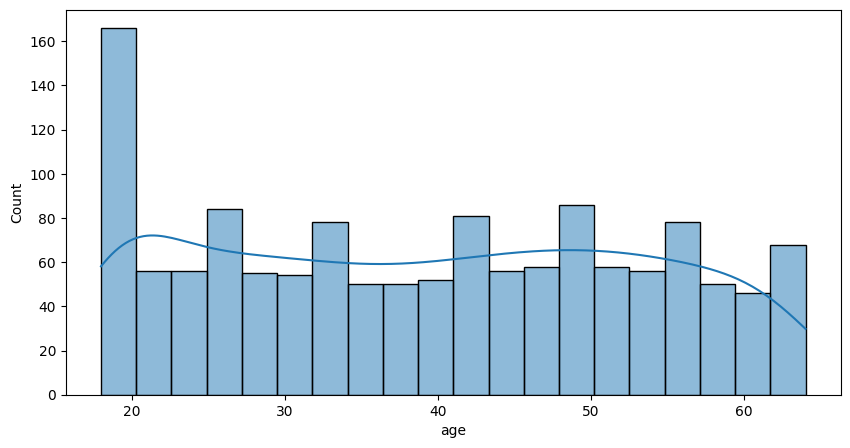

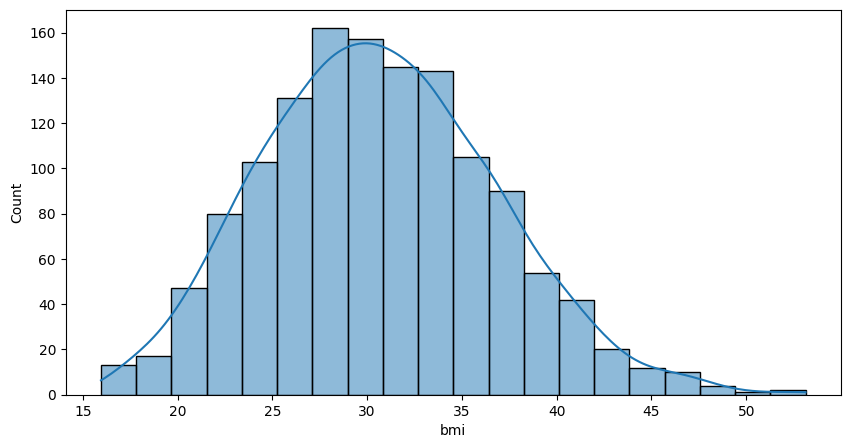

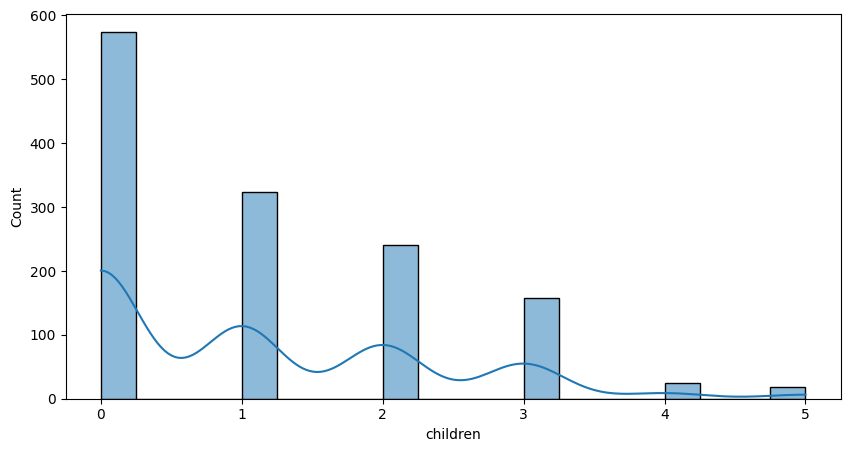

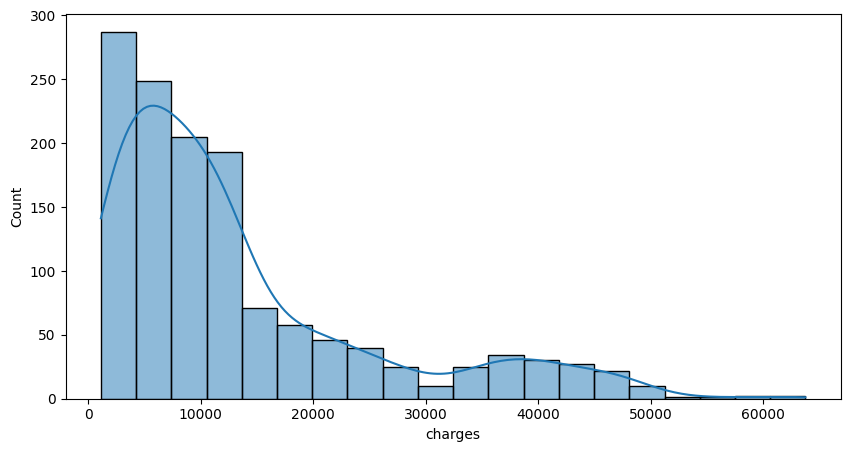

In [9]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for columns in numeric_columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df[columns],kde=True,bins = 20)
  plt.show()

<Axes: xlabel='children', ylabel='count'>

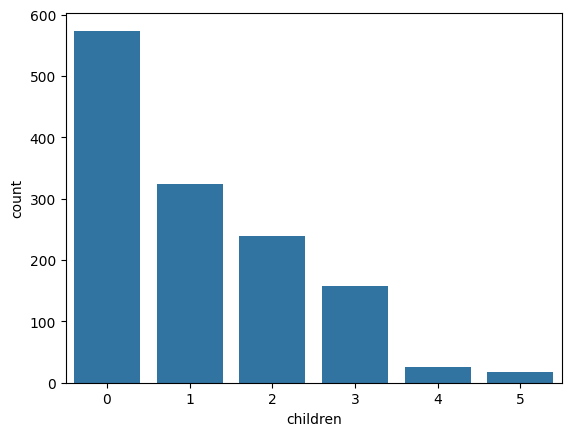

In [10]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

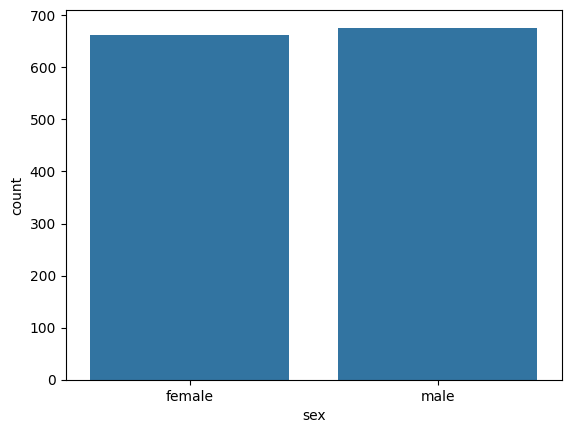

In [11]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

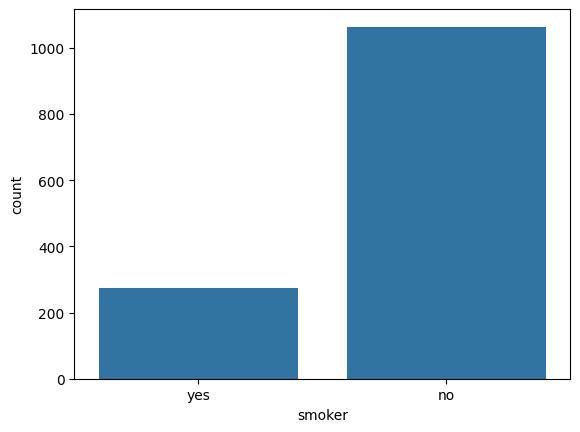

In [12]:
sns.countplot(x = df['smoker'])

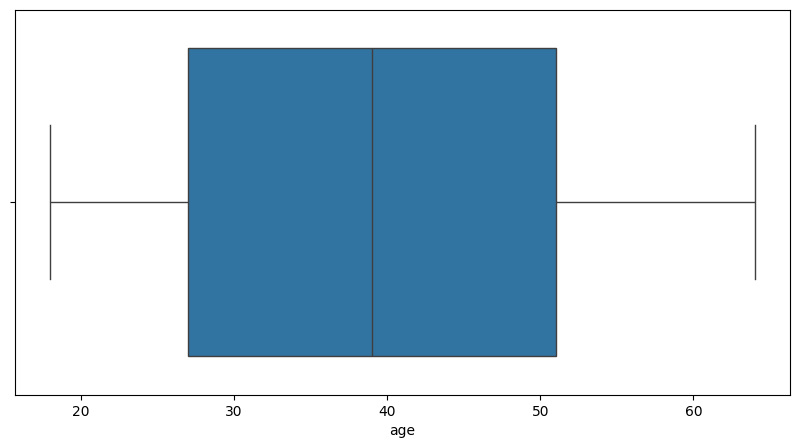

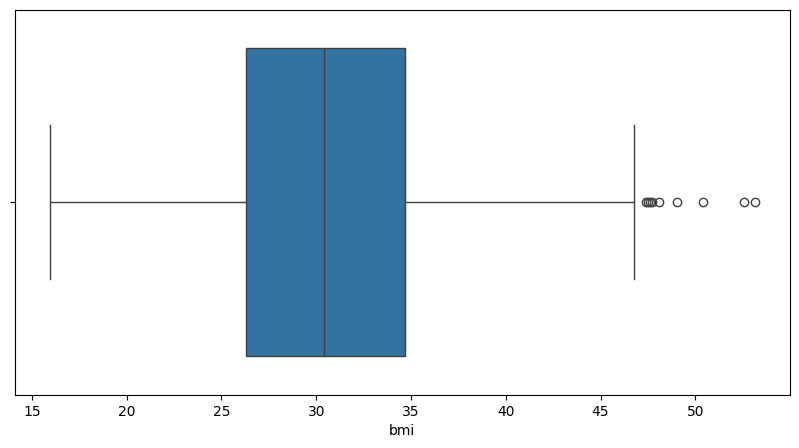

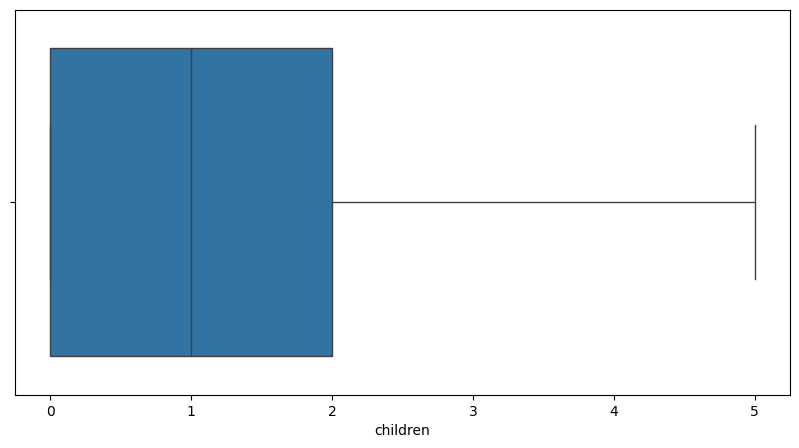

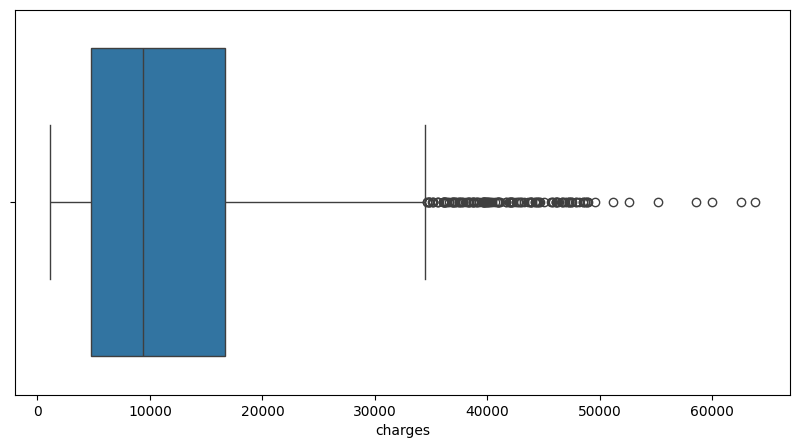

In [13]:
for col in numeric_columns:                                         # To know the outliers in the data/distribution
  plt.figure(figsize=(10,5))
  sns.boxplot(x = df[col])
  plt.show()

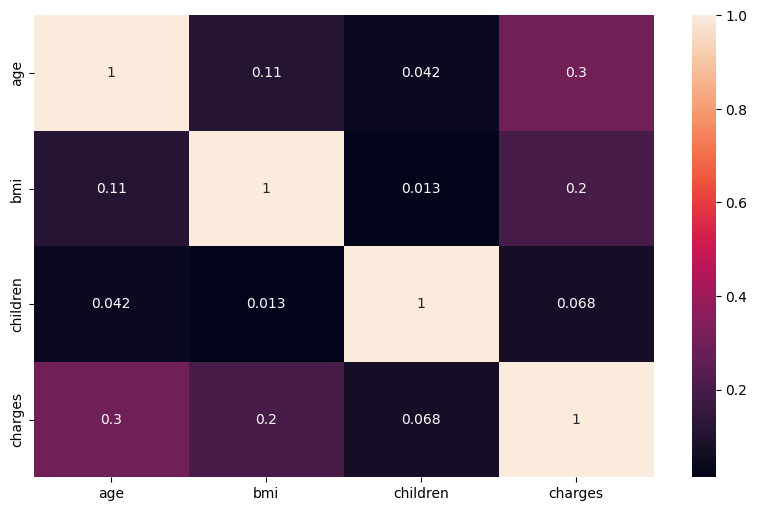

In [14]:
plt.figure(figsize=(10,6))                                                #Correlation of numeric values
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

# **Data Cleaning and Preprocessing**

In [15]:
df_cleaned = df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
#To remove duplicates
df_cleaned.drop_duplicates(inplace=True)

In [17]:
df_cleaned.shape

(1337, 7)

In [18]:
#Missing Value
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [19]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [20]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [21]:
#Label Encoding
df_cleaned['sex'] = df_cleaned['sex'].map({'male':0,'female':1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [22]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [23]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no':0,'yes':1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [24]:
df_cleaned.rename(columns={'sex':'is_female' , 'smoker':'is_smoker'},inplace=True)
df_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [25]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [26]:
#One hot encoding
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [27]:
df_cleaned = df_cleaned.astype('int')
df_cleaned.dtypes

,0
age,int64
is_female,int64
bmi,int64
children,int64
is_smoker,int64
charges,int64
region_northwest,int64
region_southeast,int64
region_southwest,int64


In [28]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# **Feature Engineering and Extraction**

<Axes: xlabel='bmi', ylabel='Count'>

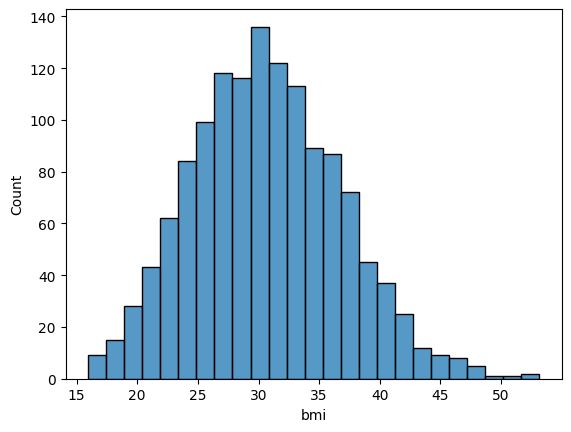

In [29]:
sns.histplot(df['bmi'])

In [30]:
#Creating a bmi_category column with
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins = [0,18.5,24.9,29.9,np.inf],
    labels = ['Underweight','Normal','Overweight','Obese']
)

In [31]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [32]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)
df_cleaned = df_cleaned.astype('int')

In [33]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [34]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [35]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


In [36]:
#Pearson Correlation Calculation
from scipy.stats import pearsonr

#List of features to check against target(target is charges)
selected_features = ['age','bmi','children','is_female','is_smoker','region_northwest','region_southeast','region_southwest','bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese']


#For comparing the faetures with charges.
correlation = {
    feature : pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlation.items()),columns=['Feature','Pearson Correlation']).sort_values(by='Pearson Correlation',ascending=False)  #sort by highest to lowest correlation.
correlation_df

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [37]:
categorical_features = ['is_female','is_smoker','region_northwest','region_southeast','region_southwest','bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese']

In [38]:
from scipy.stats import chi2_contingency

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'],q=4,labels=False)
chi2_results = {}

for feature in categorical_features:
  contingency_table = pd.crosstab(df_cleaned[feature],df_cleaned['charges_bin'])
  chi2,p,_,_ = chi2_contingency(contingency_table)
  decision = 'Reject Null Hypothesis(Keep Features)' if p < alpha else 'Accept Null Hypothesis(Drop Feature)'
  chi2_results[feature] = {
      'Chi2_statistic':chi2,
      'p-value':p,
      'Decision':decision
  }


chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p-value')
chi2_df

,Chi2_statistic,p-value,Decision
is_smoker,848.219178,0.0,Reject Null Hypothesis(Keep Features)
region_southeast,15.998167,0.001135,Reject Null Hypothesis(Keep Features)
is_female,10.258784,0.01649,Reject Null Hypothesis(Keep Features)
bmi_category_Obese,8.515711,0.036473,Reject Null Hypothesis(Keep Features)
region_southwest,5.091893,0.165191,Accept Null Hypothesis(Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null Hypothesis(Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null Hypothesis(Drop Feature)
region_northwest,1.13424,0.768815,Accept Null Hypothesis(Drop Feature)


In [39]:
final_df = df_cleaned[['age','is_female','bmi','children','is_smoker','charges','region_southeast','bmi_category_Obese']]

In [40]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


# **Machine Learning (Creating a Linear Regression Model)**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = final_df.drop('charges',axis=1)
y = final_df['charges']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [53]:
#For performance evaluation
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))       # 1 - Sum of Residuals / Total Residuals
adjusted_r2

0.7987962362937233

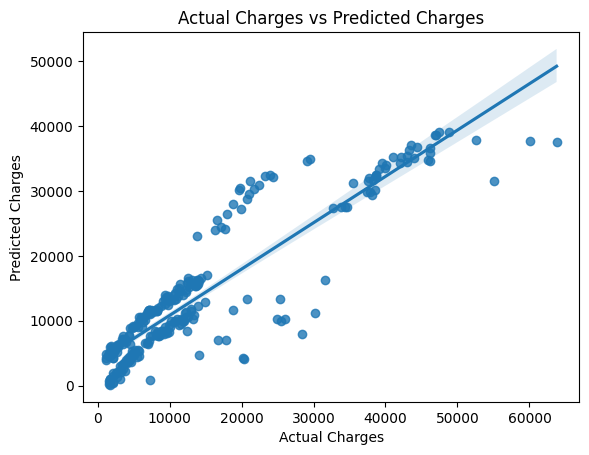


Model Accuracy :  0.8040712413347119


In [60]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()
print("\nModel Accuracy : ",model.score(X_test,y_test))

Model Accuracy is ~=80% .